### OLYMPICS 1896-2022

In [195]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [294]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# Project Introduction


# # Olympics Data Analysis (1896–2022)


## Introduction
The Olympic Games are the world’s largest sporting event, with a history spanning more than 120 years. 
This project analyzes historical Olympics data to uncover participation trends, country performance, 
gender representation, and sport-wise medal distribution.

## Problem Statement
The goal is to explore Olympic datasets to identify:
- How participation and events have evolved over time.
- Which countries dominate medal counts.
- How gender diversity has changed across decades.
- Which sports contribute most to medal tallies.

## Objectives
- Track growth in Olympic participation and events.
- Compare performance of top medal-winning countries.
- Analyze gender representation trends.
- Study sport-wise medal contributions.


 ## Load Dataset

In [196]:
host = pd.read_csv("D:\\powerbi\\projects\\Upcoming Project\\Olympics\\olympic_hosts.csv", na_values={" "})
ath = pd.read_csv("D:\\powerbi\\projects\\Upcoming Project\\Olympics\\olympic_athletes.csv", na_values={"first_game" : " "})
medal = pd.read_csv("D:\\powerbi\\projects\\Upcoming Project\\Olympics\\olympic_medals.csv")
result = pd.read_csv("D:\\powerbi\\projects\\Upcoming Project\\Olympics\\olympic_results.csv")


In [197]:
host.head(5)

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014


In [198]:
host.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   game_slug        53 non-null     object
 1   game_end_date    53 non-null     object
 2   game_start_date  53 non-null     object
 3   game_location    53 non-null     object
 4   game_name        53 non-null     object
 5   game_season      53 non-null     object
 6   game_year        53 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.0+ KB


In [199]:
ath.head(5)

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,NaN,NaN
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0,NaN,NaN
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.0,NaN,NaN
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.0,NaN,NaN
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.0,NaN,NaN


In [200]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75903 entries, 0 to 75902
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   athlete_url           75903 non-null  object 
 1   athlete_full_name     75903 non-null  object 
 2   games_participations  75903 non-null  int64  
 3   first_game            75881 non-null  object 
 4   athlete_year_birth    73447 non-null  float64
 5   athlete_medals        15351 non-null  object 
 6   bio                   22841 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.1+ MB


In [201]:
medal.head(5)

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


In [202]:
medal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21697 entries, 0 to 21696
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   discipline_title       21697 non-null  object
 1   slug_game              21697 non-null  object
 2   event_title            21697 non-null  object
 3   event_gender           21697 non-null  object
 4   medal_type             21697 non-null  object
 5   participant_type       21697 non-null  object
 6   participant_title      6584 non-null   object
 7   athlete_url            17027 non-null  object
 8   athlete_full_name      18073 non-null  object
 9   country_name           21697 non-null  object
 10  country_code           20195 non-null  object
 11  country_3_letter_code  21697 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


In [203]:
result.head(5)

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN


In [204]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162804 entries, 0 to 162803
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   discipline_title       162804 non-null  object
 1   event_title            162804 non-null  object
 2   slug_game              162804 non-null  object
 3   participant_type       162804 non-null  object
 4   medal_type             20206 non-null   object
 5   athletes               7976 non-null    object
 6   rank_equal             32526 non-null   object
 7   rank_position          158926 non-null  object
 8   country_name           162804 non-null  object
 9   country_code           157768 non-null  object
 10  country_3_letter_code  162804 non-null  object
 11  athlete_url            129991 non-null  object
 12  athlete_full_name      141646 non-null  object
 13  value_unit             78646 non-null   object
 14  value_type             90049 non-null   object
dtype

## Data Cleaning

In [205]:
host.isnull().sum()


game_slug          0
game_end_date      0
game_start_date    0
game_location      0
game_name          0
game_season        0
game_year          0
dtype: int64

In [206]:
# change data type
host['game_start_date'] = pd.to_datetime(host['game_start_date'])
host['game_end_date'] = pd.to_datetime(host['game_end_date'])
host['game_year'] = host['game_year'].astype(int)

host.info()
host.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   game_slug        53 non-null     object             
 1   game_end_date    53 non-null     datetime64[ns, UTC]
 2   game_start_date  53 non-null     datetime64[ns, UTC]
 3   game_location    53 non-null     object             
 4   game_name        53 non-null     object             
 5   game_season      53 non-null     object             
 6   game_year        53 non-null     int32              
dtypes: datetime64[ns, UTC](2), int32(1), object(4)
memory usage: 2.8+ KB


,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20 12:00:00+00:00,2022-02-04 15:00:00+00:00,China,Beijing 2022,Winter,2022
1,tokyo-2020,2021-08-08 14:00:00+00:00,2021-07-23 11:00:00+00:00,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,2018-02-25 08:00:00+00:00,2018-02-08 23:00:00+00:00,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,2016-08-21 21:00:00+00:00,2016-08-05 12:00:00+00:00,Brazil,Rio 2016,Summer,2016
4,sochi-2014,2014-02-23 16:00:00+00:00,2014-02-07 04:00:00+00:00,Russian Federation,Sochi 2014,Winter,2014


In [207]:
ath.isnull().sum()

athlete_url                 0
athlete_full_name           0
games_participations        0
first_game                 22
athlete_year_birth       2456
athlete_medals          60552
bio                     53062
dtype: int64

In [208]:
# Drop Empty columns
ath = ath.drop(columns='athlete_medals')
ath = ath.drop(columns='bio')

ath.head(5)

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.0
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.0
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.0


In [209]:
# Fix missing Values

ath['athlete_year_birth'] = ath['athlete_year_birth'].fillna(ath['athlete_year_birth'].median())  # numeric

# Remove Missing First Game
ath = ath.dropna()

In [210]:
# modify data type

ath['year'] = ath['first_game'].str.extract(r'(\d{4})').astype(int)

ath['athlete_year_birth'] = ath['athlete_year_birth'].astype('Int64')

ath['age_at_event'] = ath['year'] - ath['athlete_year_birth']

ath['age_at_event'] = ath['age_at_event'].astype('Int64')
ath['age_at_event'] = ath['age_at_event'].abs()
ath.head()


,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,year,age_at_event
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000,2022,22
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995,2018,23
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993,2022,29
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995,2022,27
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989,2022,33



=== Outlier Analysis for ath ===
                Q1    Q3  IQR  Lower Bound  Upper Bound  Outlier Count  \
age_at_event  21.0  27.0  6.0         12.0         36.0         4301.0   

              Outlier %  
age_at_event   5.668086  


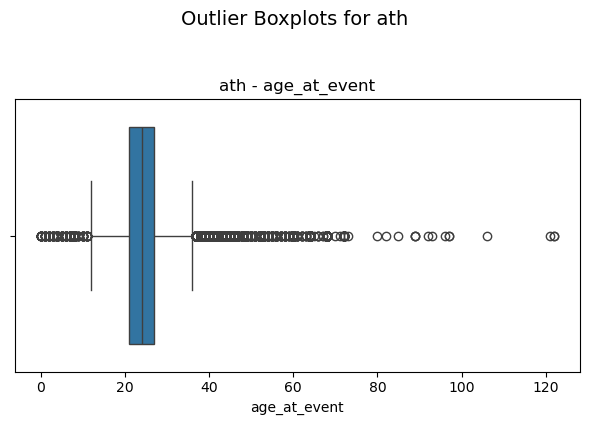

In [211]:
# outlier detection

# IQR

def detect_outliers_iqr(df, columns):
    outlier_summary = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_summary[col] = {
            "Q1": Q1,
            "Q3": Q3,
            "IQR": IQR,
            "Lower Bound": lower_bound,
            "Upper Bound": upper_bound,
            "Outlier Count": outliers.shape[0],
            "Outlier %": (outliers.shape[0] / df.shape[0]) * 100
        }
    return pd.DataFrame(outlier_summary).T


# column analysis
columns_to_check = {
    "ath": (ath, ["age_at_event"]),

  
}

outlier_reports = {}

for name, (df, cols) in columns_to_check.items():
    report = detect_outliers_iqr(df, cols)
    outlier_reports[name] = report
    print(f"\n=== Outlier Analysis for {name} ===")
    print(report)

# Visualize all selected columns in subplots
for name, (df, cols) in columns_to_check.items():
    fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(6 * len(cols), 4))
    
    if len(cols) == 1:
        axes = [axes]  
    
    for ax, col in zip(axes, cols):
        sns.boxplot(x=df[col], ax=ax)
        ax.set_title(f"{name} - {col}", fontsize=12)
    
    plt.suptitle(f"Outlier Boxplots for {name}", fontsize=14, y=1.05)
    plt.tight_layout()
    plt.show()




In [243]:
# outlier fix

lower_cap = ath['age_at_event'].quantile(0.05)
upper_cap = ath['age_at_event'].quantile(0.95)

ath['age_at_event'] = ath['age_at_event'].clip(lower=lower_cap, upper=upper_cap)


In [212]:
# Null

medal.isnull().sum()

discipline_title             0
slug_game                    0
event_title                  0
event_gender                 0
medal_type                   0
participant_type             0
participant_title        15113
athlete_url               4670
athlete_full_name         3624
country_name                 0
country_code              1502
country_3_letter_code        0
dtype: int64

In [213]:
# Fix Missing Values

medal['participant_title'] = medal['participant_title'].fillna("unknown")   # categorical
medal['athlete_url'] = medal['athlete_url'].fillna("no url") 
medal['athlete_full_name'] = medal['athlete_full_name'].fillna("unknown") 


medal['country_code'] = medal['country_code'].fillna("UNK")  # means unknown


In [214]:
medal = medal[medal['athlete_full_name'] != "unknown"]
medal.head(8)

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE
5,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/oskar-eriksson,Oskar ERIKSSON,Sweden,SE,SWE
12,Freestyle Skiing,beijing-2022,Men's Moguls,Men,SILVER,Athlete,unknown,https://olympics.com/en/athletes/mikael-kingsbury,Mikael KINGSBURY,Canada,CA,CAN
13,Freestyle Skiing,beijing-2022,Men's Moguls,Men,GOLD,Athlete,unknown,https://olympics.com/en/athletes/wallberg,Walter WALLBERG,Sweden,SE,SWE


In [215]:

result.isnull().sum()

discipline_title              0
event_title                   0
slug_game                     0
participant_type              0
medal_type               142598
athletes                 154828
rank_equal               130278
rank_position              3878
country_name                  0
country_code               5036
country_3_letter_code         0
athlete_url               32813
athlete_full_name         21158
value_unit                84158
value_type                72755
dtype: int64

In [216]:
## Fix missing

result['medal_type'] = result['medal_type'].fillna("No Medal")

result['athletes'] = result['athletes'].fillna("Team")

result['rank_equal'] = result['rank_equal'].fillna(0)

result['rank_position'] = result['rank_position'].fillna("NaN")

result['country_code'] = result['country_code'].fillna("UNK")

result['athlete_url'] = result['athlete_url'].fillna("No URL")

result['athlete_full_name'] = result['athlete_full_name'].fillna("Team")

result['value_unit'] = result['value_unit'].fillna("N/A")
result['value_type'] = result['value_type'].fillna("N/A")



In [217]:
result.head(5)

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,No URL,Team,N/A,N/A
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,No URL,Team,N/A,N/A
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,No URL,Team,N/A,N/A
3,Curling,Mixed Doubles,beijing-2022,GameTeam,No Medal,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,No URL,Team,N/A,N/A
4,Curling,Mixed Doubles,beijing-2022,GameTeam,No Medal,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,No URL,Team,N/A,N/A


In [295]:
# CLEANED CSV:

host.to_csv("D:\\powerbi\\projects\\Upcoming Project\\Olympics\\cleaned Csv\\host.csv",index=False)

ath.to_csv("D:\\powerbi\\projects\\Upcoming Project\\Olympics\\cleaned Csv\\ath.csv",index=False)

medal.to_csv("D:\\powerbi\\projects\\Upcoming Project\\Olympics\\cleaned Csv\\medal.csv",index=False)

result.to_csv("D:\\powerbi\\projects\\Upcoming Project\\Olympics\\cleaned Csv\\result.csv",index=False)

# Exploratory Data Analysis

In [218]:
result.describe()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
count,162804,162804,162804,162804,162804,162804,162804,162804,162804,162804,162804,162804,162804,162804,162804
unique,86,1567,53,2,4,6846,2,194,238,214,233,68105,75264,46476,13
top,Athletics,individual mixed,rio-2016,Athlete,No Medal,Team,False,9,United States of America,US,USA,No URL,Team,N/A,N/A
freq,19259,2731,7672,141646,142598,154828,139191,8279,11916,11916,11916,32813,21158,84158,72755


In [219]:
ath.describe()

,games_participations,athlete_year_birth,year,age_at_event
count,75881.000000,75881.0,75881.000000,75881.0
mean,1.536313,1961.820443,1984.765857,25.207035
std,0.854291,27.694746,28.684006,7.07706
min,1.000000,1836.0,1896.000000,0.0
25%,1.000000,1947.0,1968.000000,21.0
50%,1.000000,1968.0,1992.000000,24.0
75%,2.000000,1983.0,2008.000000,27.0
max,10.000000,2009.0,2022.000000,122.0


In [220]:
medal.describe()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
count,18073,18073,18073,18073,18073,18073,18073,18073,18073,18073,18073,18073
unique,67,53,1192,4,3,2,239,12117,12895,151,141,151
top,Athletics,tokyo-2020,Individual men,Men,BRONZE,Athlete,unknown,no url,Michael PHELPS,United States of America,US,USA
freq,2795,1007,215,11666,6337,15113,15113,1046,16,2616,2616,2616


In [221]:
# Winter Olympics
df_winter = host[host["game_season"] == "Winter"]

df_winter 

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20 12:00:00+00:00,2022-02-04 15:00:00+00:00,China,Beijing 2022,Winter,2022
2,pyeongchang-2018,2018-02-25 08:00:00+00:00,2018-02-08 23:00:00+00:00,Republic of Korea,PyeongChang 2018,Winter,2018
4,sochi-2014,2014-02-23 16:00:00+00:00,2014-02-07 04:00:00+00:00,Russian Federation,Sochi 2014,Winter,2014
6,vancouver-2010,2010-02-28 04:00:00+00:00,2010-02-12 16:00:00+00:00,Canada,Vancouver 2010,Winter,2010
8,turin-2006,2006-02-26 19:00:00+00:00,2006-02-10 07:00:00+00:00,Italy,Turin 2006,Winter,2006
10,salt-lake-city-2002,2002-02-24 08:00:00+00:00,2002-02-08 15:00:00+00:00,United States,Salt Lake City 2002,Winter,2002
12,nagano-1998,1998-02-22 11:00:00+00:00,1998-02-06 23:00:00+00:00,Japan,Nagano 1998,Winter,1998
14,lillehammer-1994,1994-02-27 19:00:00+00:00,1994-02-12 07:00:00+00:00,Norway,Lillehammer 1994,Winter,1994
16,albertville-1992,1992-02-23 19:00:00+00:00,1992-02-08 07:00:00+00:00,France,Albertville 1992,Winter,1992
18,calgary-1988,1988-02-28 03:00:00+00:00,1988-02-13 15:00:00+00:00,Canada,Calgary 1988,Winter,1988


In [222]:
# Summer Olympics
df_winter = host[host["game_season"] == "Summer"]

df_winter 

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
1,tokyo-2020,2021-08-08 14:00:00+00:00,2021-07-23 11:00:00+00:00,Japan,Tokyo 2020,Summer,2020
3,rio-2016,2016-08-21 21:00:00+00:00,2016-08-05 12:00:00+00:00,Brazil,Rio 2016,Summer,2016
5,london-2012,2012-08-12 19:00:00+00:00,2012-07-27 07:00:00+00:00,Great Britain,London 2012,Summer,2012
7,beijing-2008,2008-08-24 12:00:00+00:00,2008-08-08 00:00:00+00:00,China,Beijing 2008,Summer,2008
9,athens-2004,2004-08-29 18:00:00+00:00,2004-08-13 06:00:00+00:00,Greece,Athens 2004,Summer,2004
11,sydney-2000,2000-10-01 09:00:00+00:00,2000-09-15 01:00:00+00:00,Australia,Sydney 2000,Summer,2000
13,atlanta-1996,1996-08-05 21:00:00+00:00,1996-07-19 12:00:00+00:00,United States,Atlanta 1996,Summer,1996
15,barcelona-1992,1992-08-09 18:00:00+00:00,1992-07-25 06:00:00+00:00,Spain,Barcelona 1992,Summer,1992
17,seoul-1988,1988-10-02 10:00:00+00:00,1988-09-16 22:00:00+00:00,Republic of Korea,Seoul 1988,Summer,1988
19,los-angeles-1984,1984-08-12 19:00:00+00:00,1984-07-28 15:00:00+00:00,United States,Los Angeles 1984,Summer,1984


In [223]:
# How many Olympic Games are included?

medal['discipline_title'].nunique()   ############ add in notes

67

In [224]:
# Games Played in Olympics

medal['discipline_title'].unique()  ############ add in notes

array(['Curling', 'Freestyle Skiing', 'Short Track Speed Skating',
       'Snowboard', 'Ski Jumping', 'Figure skating', 'Luge', 'Biathlon',
       'Alpine Skiing', 'Skeleton', 'Cross Country Skiing',
       'Speed skating', 'Nordic Combined', 'Bobsleigh', 'Shooting',
       'Diving', 'Canoe Sprint', 'Cycling Road', 'Boxing',
       'Artistic Swimming', 'Cycling BMX Racing', 'Triathlon', 'Surfing',
       'Table Tennis', 'Canoe Slalom', 'Marathon Swimming',
       'Trampoline Gymnastics', 'Taekwondo', 'Cycling Track', 'Fencing',
       'Badminton', 'Sport Climbing', 'Wrestling', 'Tennis',
       'Artistic Gymnastics', 'Golf', 'Cycling BMX Freestyle', 'Judo',
       'Skateboarding', 'Archery', 'Weightlifting', 'Equestrian',
       'Modern Pentathlon', 'Athletics', 'Swimming', 'Sailing',
       'Cycling Mountain Bike', 'Rowing', 'Karate', 'Rhythmic Gymnastics',
       'Beach Volleyball', 'Short Track', 'Cycling BMX',
       'Gymnastics Rhythmic', 'Equestrian Jumping', 'Gymnastics Artistic

In [225]:
# How many countries have participated?

medal['country_name'].nunique()

151

In [226]:
# Countries Name which Participted in Olympics 

medal['country_name'].unique()

array(['Italy', 'Norway', 'Sweden', 'Canada', 'Japan', 'New Zealand',
       'United States of America', 'ROC', 'Switzerland',
       "People's Republic of China", 'France', 'Australia', 'Germany',
       'Ukraine', 'Belarus', 'Estonia', 'Netherlands', 'Hungary',
       'Republic of Korea', 'Belgium', 'Spain', 'Slovenia', 'Austria',
       'Czech Republic', 'Poland', 'Slovakia', 'Finland', 'San Marino',
       'Serbia', 'Cuba', 'Great Britain', 'Bulgaria',
       'Islamic Republic of Iran', 'Kuwait', 'Denmark', 'Mexico',
       'Republic of Moldova', 'Brazil', 'Portugal', 'Ecuador', 'Ireland',
       'Philippines', 'Kazakhstan', 'Uzbekistan', 'Azerbaijan', 'Ghana',
       'Thailand', 'Turkey', 'India', 'Chinese Taipei', 'Armenia',
       'Colombia', 'Bermuda', 'South Africa', 'Egypt', 'Jordan',
       'Croatia', 'North Macedonia', "Côte d'Ivoire", 'Tunisia', 'Israel',
       'Malaysia', 'Hong Kong, China', 'Romania', 'Indonesia', 'Mongolia',
       'Kyrgyzstan', 'Nigeria', 'Georgia', '

In [227]:
# How many athletes are recorded in total?

medal['athlete_full_name'].nunique()

12895

In [228]:
# What is the time span covered (earliest to latest Games)?

(host['game_end_date'] - host['game_start_date']).mean()


Timedelta('29 days 07:03:35.094339622')

# Medal Analysis

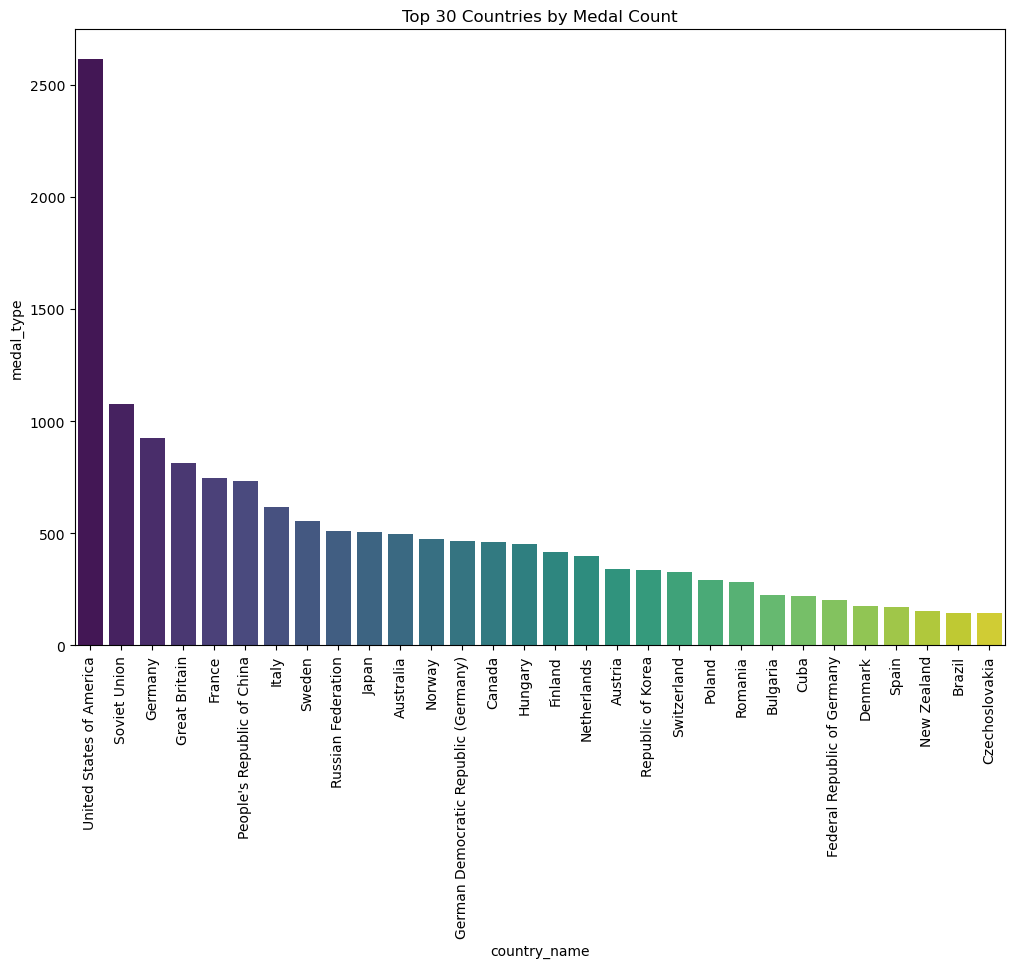

In [229]:

# Which countries have won the most medals overall?

lt = medal.groupby('country_name',as_index=False)['medal_type'].count().sort_values(by='medal_type', ascending=False).head(30)

plt.figure(figsize=(12,8))
sns.barplot(x="country_name",y= "medal_type", data= lt, hue="country_name",legend=False, palette="viridis")
plt.title("Top 30 Countries by Medal Count")

plt.xticks(rotation=90)
plt.show()

In [230]:
# Which countries dominate in Gold / Silver / Bronze separately?

medal_counts = medal.groupby(['country_name', 'medal_type']).size().reset_index(name='count')

# --- Leaders for each medal type ---
gold_leader = medal_counts[medal_counts['medal_type'] == 'GOLD'].sort_values(by='count', ascending=False).head(1)
silver_leader = medal_counts[medal_counts['medal_type'] == 'SILVER'].sort_values(by='count', ascending=False).head(1)
bronze_leader = medal_counts[medal_counts['medal_type'] == 'BRONZE'].sort_values(by='count', ascending=False).head(1)

print("Gold Leader:\n", gold_leader, "\n")
print("Silver Leader:\n", silver_leader, "\n")
print("Bronze Leader:\n", bronze_leader, "\n")



Gold Leader:
                  country_name medal_type  count
349  United States of America       GOLD    978 

Silver Leader:
                  country_name medal_type  count
350  United States of America     SILVER    872 

Bronze Leader:
                  country_name medal_type  count
348  United States of America     BRONZE    766 



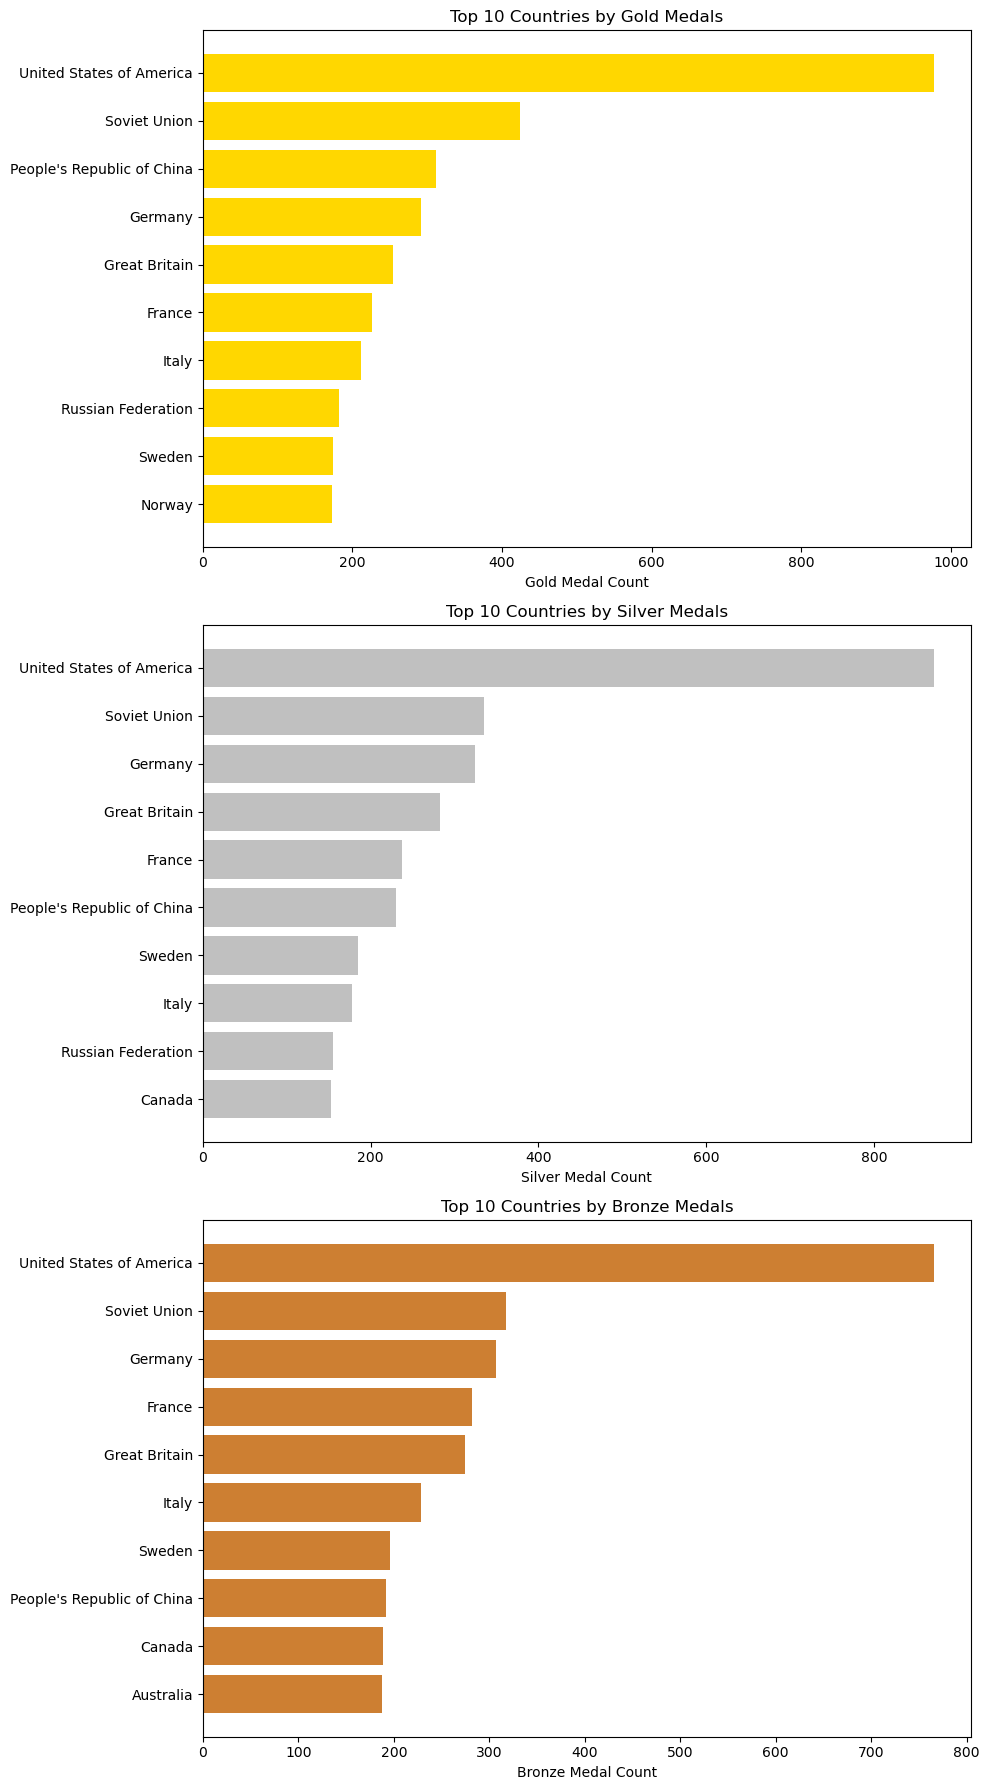

In [231]:
## Top 10 Countries in Medal Types

top_gold = medal_counts[medal_counts['medal_type'] == 'GOLD'].sort_values(by='count', ascending=False).head(10)
top_silver = medal_counts[medal_counts['medal_type'] == 'SILVER'].sort_values(by='count', ascending=False).head(10)
top_bronze = medal_counts[medal_counts['medal_type'] == 'BRONZE'].sort_values(by='count', ascending=False).head(10)

# Plot individual medal types
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Gold
axes[0].barh(top_gold['country_name'], top_gold['count'], color='gold')
axes[0].invert_yaxis()
axes[0].set_title("Top 10 Countries by Gold Medals")
axes[0].set_xlabel("Gold Medal Count")

# Silver
axes[1].barh(top_silver['country_name'], top_silver['count'], color='silver')
axes[1].invert_yaxis()
axes[1].set_title("Top 10 Countries by Silver Medals")
axes[1].set_xlabel("Silver Medal Count")

# Bronze
axes[2].barh(top_bronze['country_name'], top_bronze['count'], color='#cd7f32')
axes[2].invert_yaxis()
axes[2].set_title("Top 10 Countries by Bronze Medals")
axes[2].set_xlabel("Bronze Medal Count")

plt.tight_layout()
plt.show()


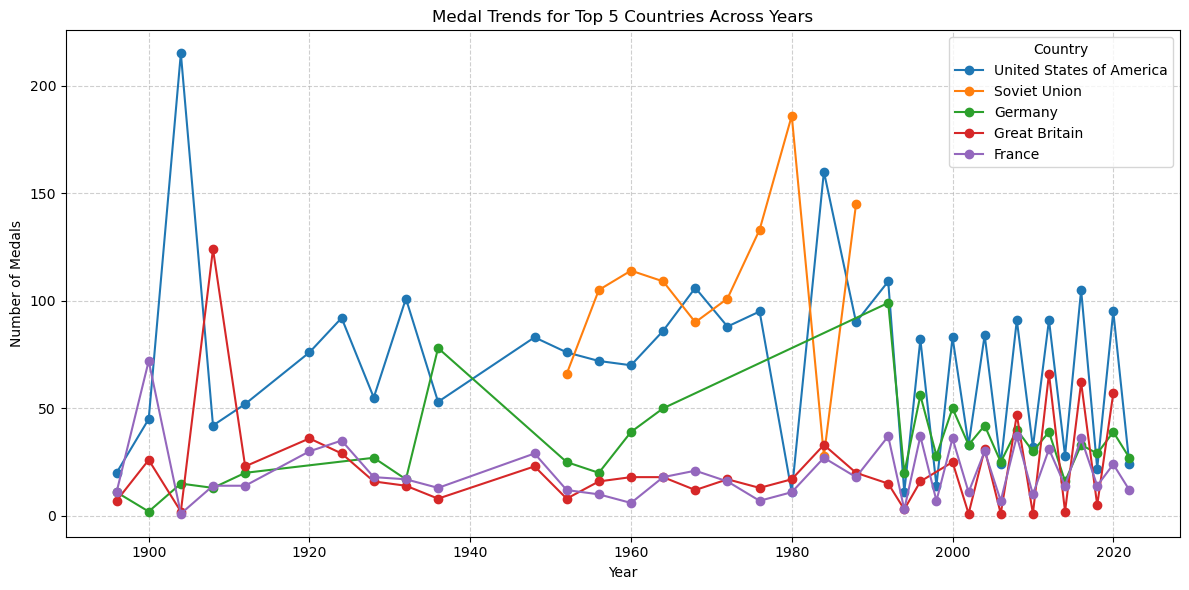

In [232]:
# What is the medal trend for top countries across different years?

medal['year'] = medal['slug_game'].str.extract(r'(\d{4})').astype(int)

# Count medals per country per year
medals_per_year = medal.groupby(['country_name', 'year']).size().reset_index(name='count')

# Find top 5 countries overall
top_countries = medals_per_year.groupby('country_name')['count'].sum().sort_values(ascending=False).head(5).index

# Filter only top countries
medals_top = medals_per_year[medals_per_year['country_name'].isin(top_countries)]

# Plot medal trend
plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = medals_top[medals_top['country_name'] == country]
    plt.plot(country_data['year'], country_data['count'], marker='o', label=country)

plt.title("Medal Trends for Top 5 Countries Across Years")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.legend(title="Country")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


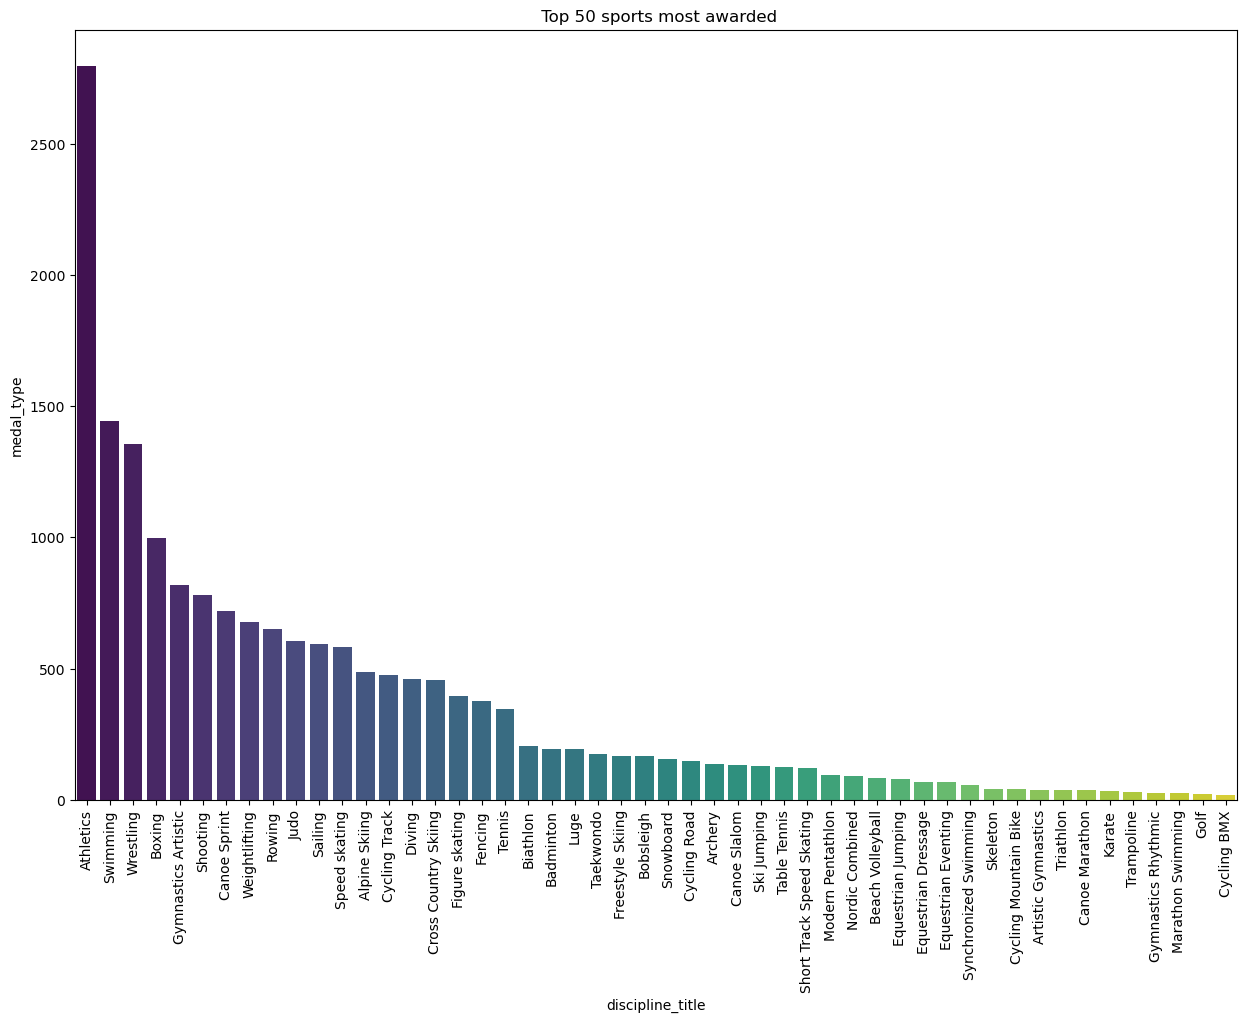

In [233]:
# Which events/sports awarded the most medals?

m = medal.groupby('discipline_title', as_index=False)['medal_type'].count().sort_values('medal_type', ascending= False).head(50)

plt.figure(figsize=(15,10))
sns.barplot(x= 'discipline_title', y = 'medal_type', data = m, hue= 'discipline_title' , palette="viridis" )
plt.title(" Top 50 sports most awarded")
plt.xticks(rotation= 90)
plt.show()

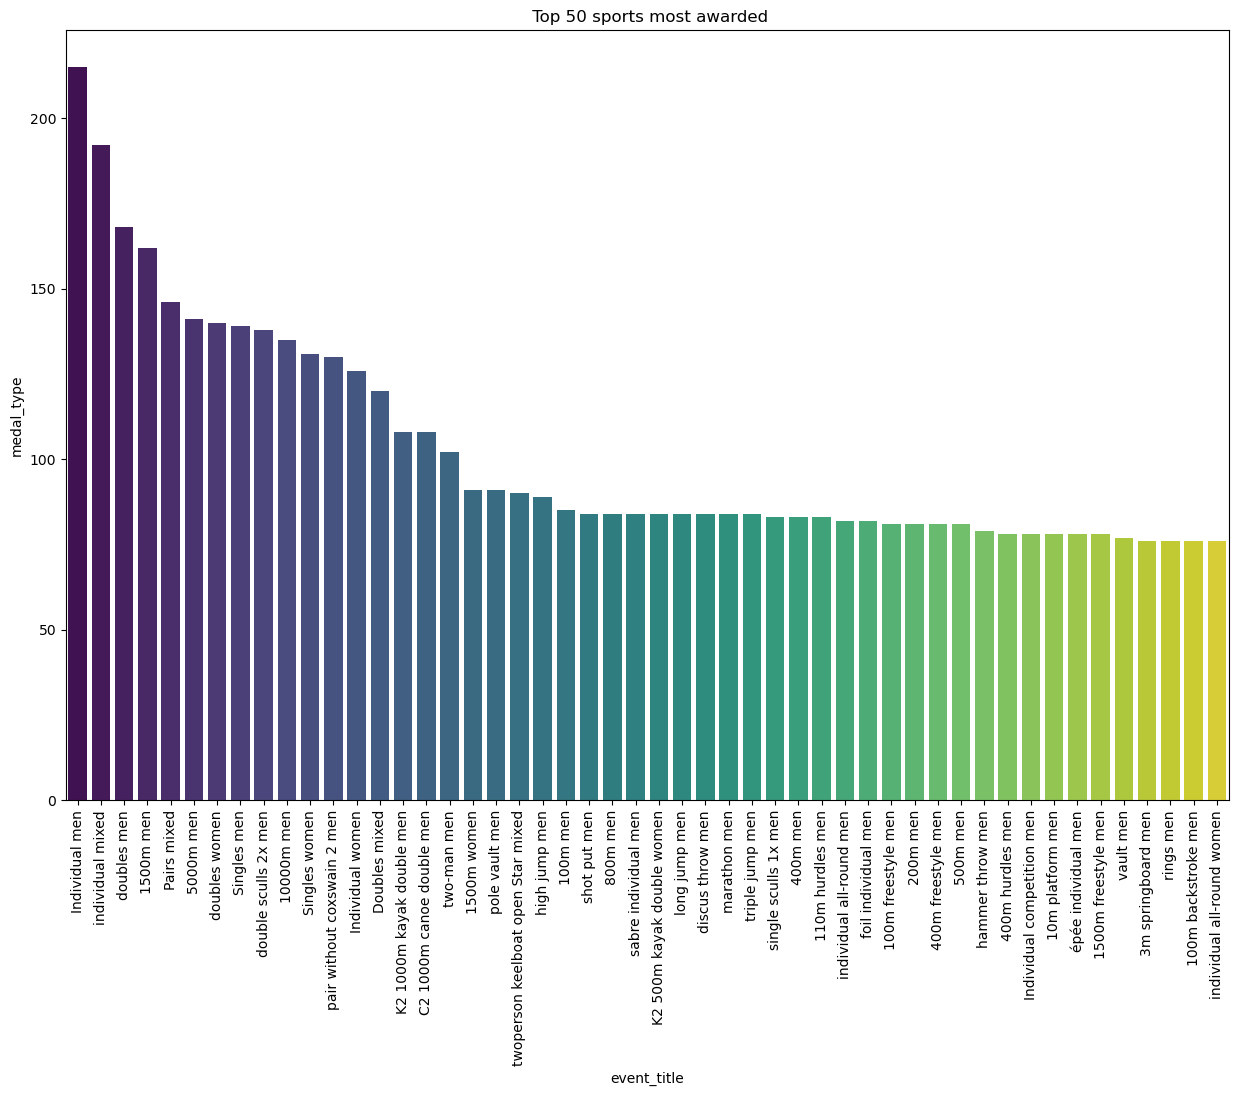

In [234]:
# No. of medal  by  event_title

m = medal.groupby('event_title', as_index= False)['medal_type'].count().sort_values('medal_type', ascending= False).head(50)

plt.figure(figsize=(15,10))
sns.barplot(x= 'event_title', y = 'medal_type', data = m, hue= 'event_title' , palette="viridis" )
plt.title(" Top 50 sports most awarded")
plt.xticks(rotation= 90)
plt.show()


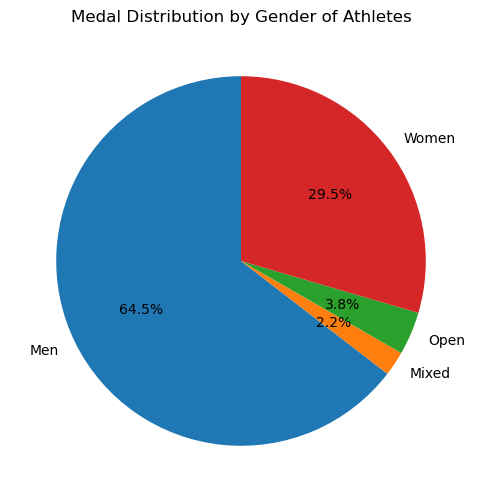

In [235]:

# Medal distribution by gender of athletes.

gender_medals = medal.groupby('event_gender', as_index=False)['medal_type'].count()
gender_medals = gender_medals.rename(columns={'medal_type': 'medal_count'})

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    gender_medals['medal_count'], 
    labels=gender_medals['event_gender'], 
    autopct='%1.1f%%', 
    startangle=90
)
plt.title("Medal Distribution by Gender of Athletes")
plt.show()

# Athlete-Level Insights

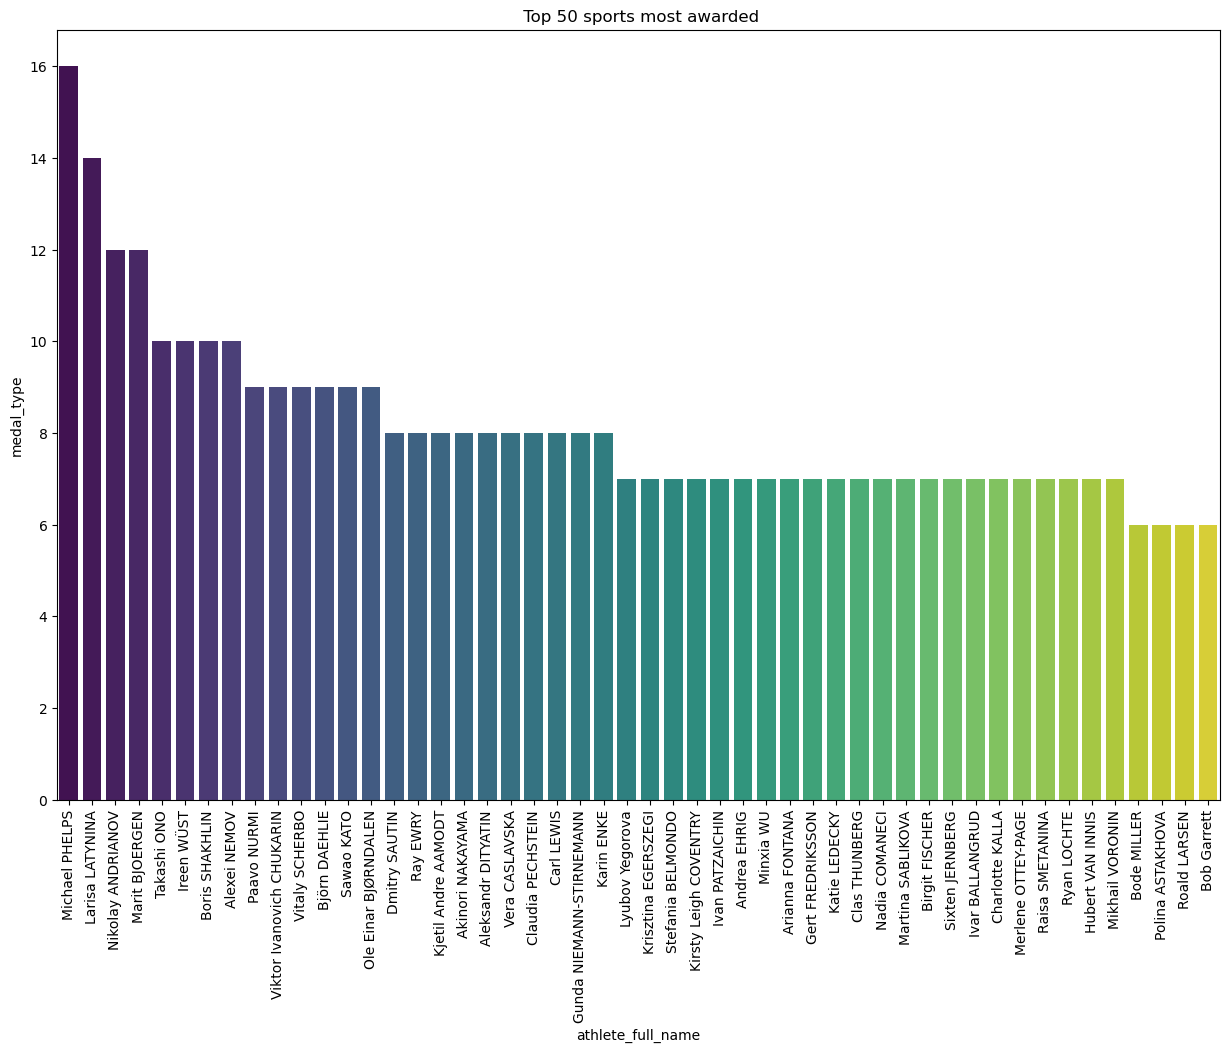

In [236]:

# Who are the most decorated athletes (by medal count)?

m = medal.groupby('athlete_full_name', as_index= False)['medal_type'].count().sort_values('medal_type', ascending= False).head(50)

plt.figure(figsize=(15,10))
sns.barplot(x= 'athlete_full_name', y = 'medal_type', data = m, hue= 'athlete_full_name' , palette="viridis" )
plt.title(" Top 50 sports most awarded")
plt.xticks(rotation= 90)
plt.show()

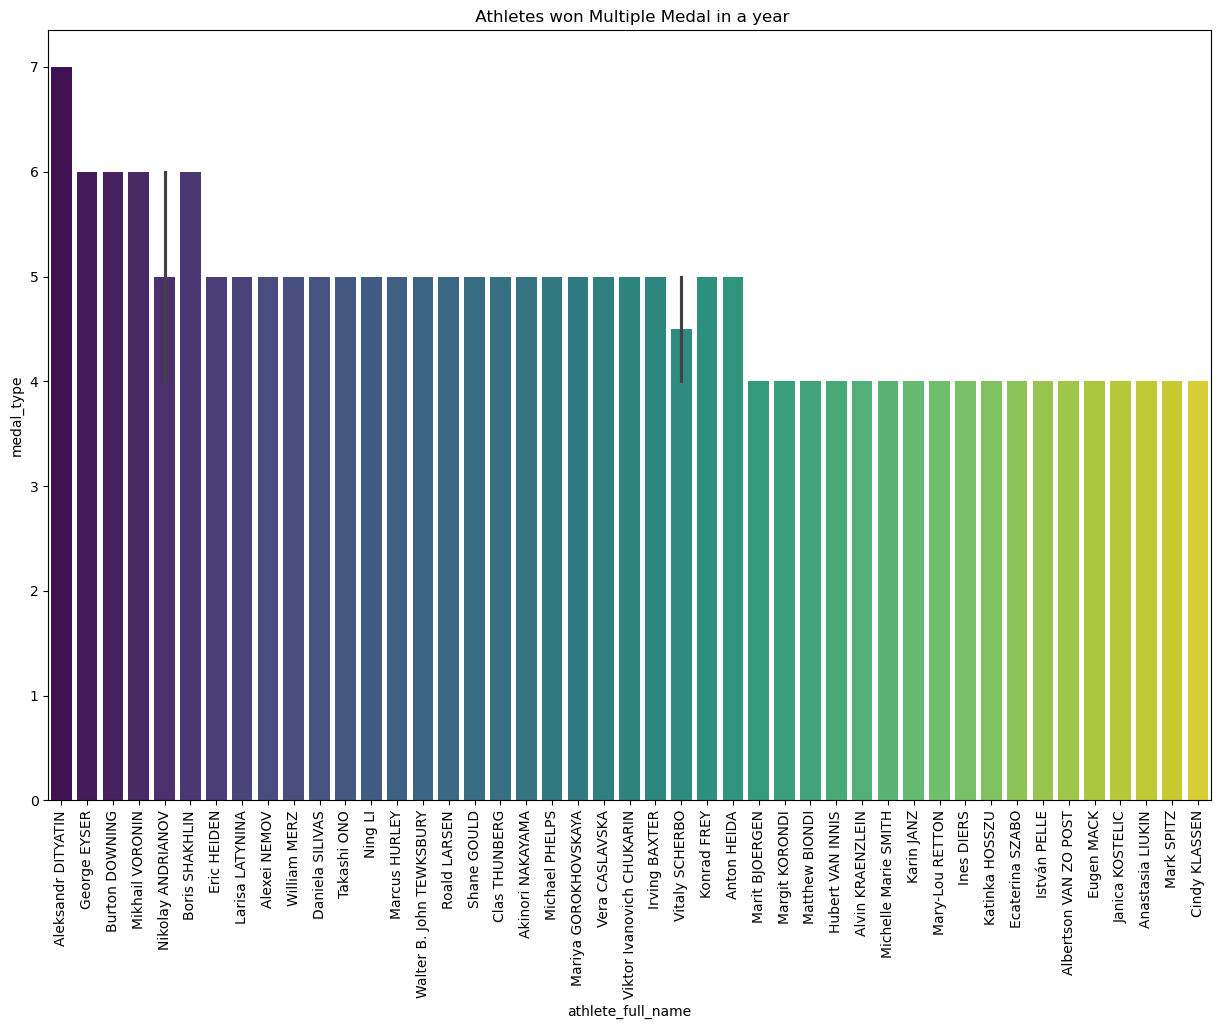

In [237]:
# Athletes who won multiple medals in the same Olympics.

m = medal.groupby(['athlete_full_name', 'slug_game'], as_index= False)['medal_type'].count().sort_values('medal_type', ascending= False).head(50)

plt.figure(figsize=(15,10))
sns.barplot(x= 'athlete_full_name', y = 'medal_type', data = m, hue= 'athlete_full_name' , palette="viridis" )
plt.title(" Athletes won Multiple Medal in a year")
plt.xticks(rotation= 90)
plt.show()

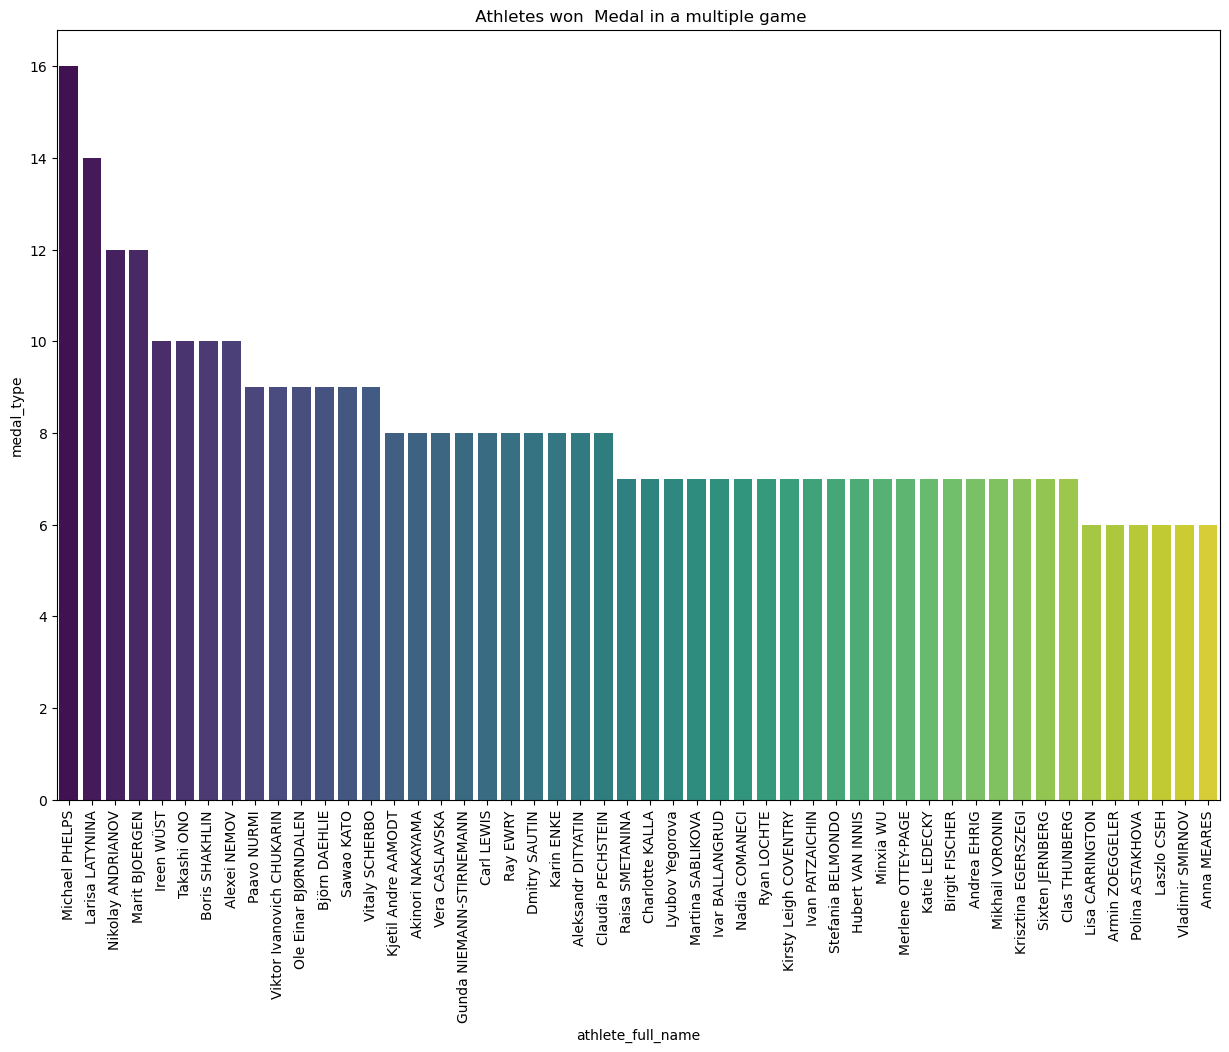

In [238]:
# Which athletes won medals across multiple Games?

m = m = medal.groupby(['athlete_full_name', 'discipline_title'], as_index= False)['medal_type'].count().sort_values('medal_type', ascending= False).head(50)

plt.figure(figsize=(15,10))
sns.barplot(x= 'athlete_full_name', y = 'medal_type', data = m, hue= 'athlete_full_name' , palette="viridis" )
plt.title(" Athletes won  Medal in a multiple game")
plt.xticks(rotation= 90)
plt.show()

In [244]:
# Youngest and oldest medalists.

l = pd.merge(ath,medal,on='athlete_full_name'  ,how='inner')

# Oldest
m = l.groupby(['athlete_full_name','age_at_event'], as_index= False)['medal_type'].count().sort_values('age_at_event', ascending= False).head(1)
m






,athlete_full_name,age_at_event,medal_type
1751,Charles Frédéric PETIT,37,2


In [245]:
# youngest
s = l.groupby(['athlete_full_name','age_at_event'], as_index= False)['medal_type'].count().sort_values('age_at_event').head(1)
s

,athlete_full_name,age_at_event,medal_type
4020,György MITRO,18,1


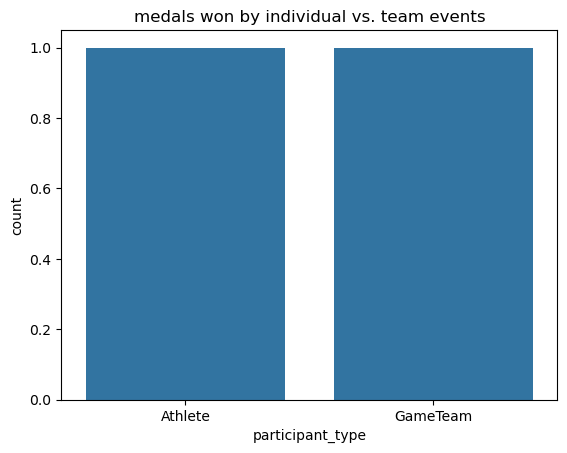

In [249]:
# Number of medals won by participant_type

m = medal.groupby('participant_type', as_index= False)['medal_type'].count().sort_values('medal_type', ascending= False)

sns.countplot(x = 'participant_type' ,  data= m )
plt.title("medals won by individual vs. team events")

plt.show()


# Sport / Discipline Analysis

In [253]:
# Which sports/disciplines have the highest medal counts?

lt = medal.groupby('discipline_title',as_index=False)['medal_type'].count().sort_values(by='medal_type', ascending=False).head(1)

lt

,discipline_title,medal_type
4,Athletics,2795


In [262]:
# Sports where certain countries dominate consistently.


m = (
    medal.groupby(['discipline_title', 'country_name'], as_index=False)['medal_type']
    .count()
    .rename(columns={'medal_type': 'medal_count'})
    .sort_values(by='medal_count', ascending=False)
)

print(m.head(50))  # Top 20 sport-country pairs


          discipline_title                          country_name  medal_count
162              Athletics              United States of America          750
1186              Swimming              United States of America          481
147              Athletics                          Soviet Union          178
104              Athletics                         Great Britain          172
1136              Swimming                             Australia          163
708    Gymnastics Artistic                          Soviet Union          162
529                 Diving              United States of America          145
1451             Wrestling              United States of America          138
1113         Speed skating                           Netherlands          126
1            Alpine Skiing                               Austria          126
305                 Boxing              United States of America          117
1440             Wrestling                          Soviet Union

In [269]:
# Sports with the most diverse participation (many countries).

m = (medal.groupby('discipline_title',as_index=False)['country_name'].nunique().rename(columns= {'country_name':'country_count'}).sort_values('country_count',ascending=False) )
print(m.head(30))

        discipline_title  country_count
4              Athletics            101
10                Boxing             81
65         Weightlifting             69
47              Shooting             66
66             Wrestling             65
57              Swimming             56
36                  Judo             56
60             Taekwondo             42
46               Sailing             42
61                Tennis             41
13          Canoe Sprint             41
45                Rowing             39
22         Cycling Track             37
29               Fencing             36
33   Gymnastics Artistic             34
21          Cycling Road             29
30        Figure skating             28
0          Alpine Skiing             25
40     Modern Pentathlon             25
54         Speed skating             24
8               Biathlon             24
31      Freestyle Skiing             24
53             Snowboard             23
15  Cross Country Skiing             23


In [270]:
# Sports with the highest medal concentration (few countries dominate).


# Medal counts per sport-country
sport_country = (
    medal.groupby(['discipline_title', 'country_name'], as_index=False)['medal_type']
    .count()
    .rename(columns={'medal_type': 'medal_count'})
)

# Total medals per sport
sport_total = sport_country.groupby('discipline_title')['medal_count'].sum().reset_index()
sport_total = sport_total.rename(columns={'medal_count': 'total_medals'})

# Merge to calculate share
sport_country = sport_country.merge(sport_total, on='discipline_title')
sport_country['share'] = sport_country['medal_count'] / sport_country['total_medals']

# For each sport, calculate concentration by summing top 3 country shares
concentration = (
    sport_country.sort_values(['discipline_title', 'share'], ascending=[True, False])
    .groupby('discipline_title')
    .head(3)  # Top 3 countries per sport
    .groupby('discipline_title')['share']
    .sum()
    .reset_index()
    .rename(columns={'share': 'top3_share'})
    .sort_values(by='top3_share', ascending=False)
)

print(concentration.head(20))

             discipline_title  top3_share
35               Jeu de Paume    1.000000
3           Artistic Swimming    1.000000
44                      Roque    1.000000
19         Cycling BMX Racing    1.000000
6               Basque Pelota    1.000000
43        Rhythmic Gymnastics    1.000000
42                    Rackets    1.000000
25       Equestrian  Vaulting    1.000000
14                    Croquet    1.000000
50              Skateboarding    0.833333
63      Trampoline Gymnastics    0.833333
59               Table Tennis    0.777778
24                 Equestrian    0.777778
5                   Badminton    0.739583
62                 Trampoline    0.733333
32                       Golf    0.681818
49  Short Track Speed Skating    0.675000
34        Gymnastics Rhythmic    0.666667
56                    Surfing    0.666667
55             Sport Climbing    0.666667


# Country & Regional Performance

In [274]:
# Which new sports were introduced in which Games (using hosts + medals)?



# Add year from slug_game
medal['year'] = medal['slug_game'].str.extract(r'(\d{4})').astype(int)

# Find the first year each sport appeared
sport_intro = (
    medal.groupby('discipline_title')['year']
    .min()
    .reset_index()
    .rename(columns={'year': 'intro_year'})
)

# Merge with hosts data to attach host details
new_sports = sport_intro.merge(
    host, left_on='intro_year', right_on='game_year', how='left'
)

# Select and sort useful columns
new_sports = new_sports[
    ['discipline_title', 'intro_year', 'game_name', 'game_location', 'game_season']
].sort_values(by='intro_year')

print(new_sports.head(30))  # Show first 20 new sports


        discipline_title  intro_year       game_name  game_location  \
42   Gymnastics Artistic        1896     Athens 1896         Greece   
80                Tennis        1896     Athens 1896         Greece   
74              Swimming        1896     Athens 1896         Greece   
60              Shooting        1896     Athens 1896         Greece   
84         Weightlifting        1896     Athens 1896         Greece   
37               Fencing        1896     Athens 1896         Greece   
30         Cycling Track        1896     Athens 1896         Greece   
29          Cycling Road        1896     Athens 1896         Greece   
85             Wrestling        1896     Athens 1896         Greece   
5              Athletics        1896     Athens 1896         Greece   
41                  Golf        1900      Paris 1900         France   
58                Rowing        1900      Paris 1900         France   
21               Croquet        1900      Paris 1900         France   
2     

In [280]:
# Which country hosted the Olympics most often and how did it perform?


# 1. Count how many times each country hosted
host_counts = host.groupby('game_location').size().reset_index(name='host_count')
top_host = host_counts.sort_values(by='host_count', ascending=False).head(1)

print("Most frequent host:\n", top_host)

# 2. Find that country’s hosted years
top_host_city = top_host['game_location'].iloc[0]
host_years = host[host['game_location'] == top_host_city]['game_year'].tolist()

print(f"\n{top_host_city} hosted in years: {host_years}")

# 3. Medal performance of host country in those years
# Need to map host city -> host country
# Some hosts are cities, so let's merge with host dataframe (game_location + game_name + year)
medal['year'] = medal['slug_game'].str.extract(r'(\d{4})').astype(int)

# Merge medals with host info
merged = medal.merge(
    host[['game_year', 'game_location']],
    left_on='year',
    right_on='game_year'
)

# Filter only host years
host_perf = (
    merged[merged['game_year'].isin(host_years)]
    .groupby(['game_location', 'year'])['medal_type']
    .count()
    .reset_index(name='medal_count')
)

print(host_perf.sort_values(by=['year'], ascending=True))



Most frequent host:
     game_location  host_count
24  United States           8

United States hosted in years: [2002, 1996, 1984, 1980, 1960, 1932, 1932, 1904]
   game_location  year  medal_count
2  United States  1904          256
3  United States  1932          678
0          Italy  1960          471
4  United States  1960          471
1           USSR  1980          662
5  United States  1980          662
6  United States  1984          718
9     Yugoslavia  1984          718
7  United States  1996          776
8  United States  2002          210


In [282]:
# Host country’s performance improvement in its own Games.



# Extract year
medal['year'] = medal['slug_game'].str.extract(r'(\d{4})').astype(int)

# Merge medals with host info (game year + location + name)
merged = medal.merge(
    host[['game_year', 'game_location', 'game_name']],
    left_on='year',
    right_on='game_year'
)

# --- Step 1: Medal counts per country per year ---
country_year_medals = (
    merged.groupby(['country_name', 'year'])['medal_type']
    .count()
    .reset_index(name='medal_count')
)

# --- Step 2: Identify host countries ---
# For each Games, we map host city -> host country
# Here we approximate host country as the 'game_location' column
host_performance = (
    merged[merged['country_name'] == merged['game_location']]
    .groupby(['country_name', 'year'])['medal_type']
    .count()
    .reset_index(name='host_medals')
)

# --- Step 3: Compare host vs average performance ---
# Average medals outside hosting years
avg_perf = (
    country_year_medals.groupby('country_name')['medal_count']
    .mean()
    .reset_index(name='avg_medals')
)

# Merge with host performance
comparison = host_performance.merge(avg_perf, on='country_name', how='left')
comparison['improvement'] = comparison['host_medals'] - comparison['avg_medals']

print(comparison.sort_values(by='improvement', ascending=False))


                   country_name  year  host_medals  avg_medals  improvement
14                      Germany  1936          156   45.642857   110.357143
15                Great Britain  1908          124   31.114286    92.885714
10                       France  1900           72   28.135135    43.864865
11                       France  1924           70   28.135135    41.864865
18                       Greece  1896           48    7.333333    40.666667
17                Great Britain  2012           66   31.114286    34.885714
0                     Australia  2000           54   20.441176    33.558824
26                        Japan  2020           51   24.483871    26.516129
35                       Sweden  1912           47   24.800000    22.200000
37                  Switzerland  1948           30   14.200000    15.800000
31            Republic of Korea  1988           30   17.400000    12.600000
4                        Brazil  2016           21    9.888889    11.111111
34          

In [ ]:

# Country medal density (medals per athlete sent).


# --- Step 1: Medal counts per country ---
medals_per_country = (
    medal.groupby('country_name')['medal_type']
    .count()
    .reset_index(name='total_medals')
)

# --- Step 2: Unique athletes per country ---
athletes_per_country = (
    medal.groupby('country_name')['athlete_full_name']
    .nunique()
    .reset_index(name='unique_athletes')
)

# --- Step 3: Merge and calculate density ---
density = medals_per_country.merge(athletes_per_country, on='country_name')
density['medal_density'] = density['total_medals'] / density['unique_athletes']

# Sort by density
density = density.sort_values(by='medal_density', ascending=False)

print(density.head(20))  # Top 20 countries by medal density


                   country_name  total_medals  unique_athletes  medal_density
150                    Zimbabwe             7                1       7.000000
51                      Grenada             3                1       3.000000
86                      Namibia             5                2       2.500000
66                      Jamaica            66               32       2.062500
25                   Costa Rica             4                2       2.000000
123                    Suriname             2                1       2.000000
114       Serbia and Montenegro             4                2       2.000000
85                   Mozambique             2                1       2.000000
0                   Afghanistan             2                1       2.000000
116                    Slovakia            42               22       1.909091
93                       Norway           475              274       1.733577
76                Liechtenstein            10                6  

# Trend & Time-Based Insights

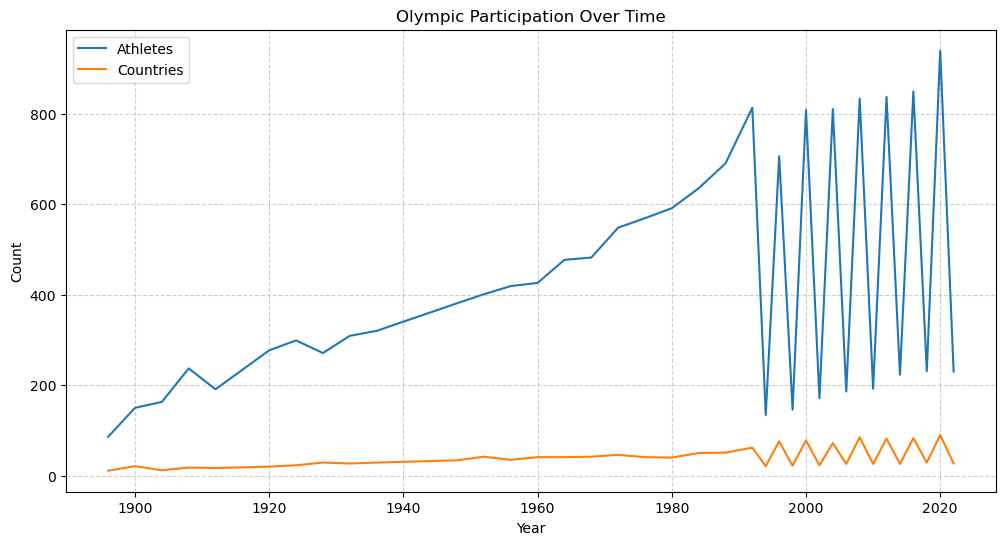

In [287]:
# How has Olympic participation (athletes, countries) changed over time?


# Extract year
medal['year'] = medal['slug_game'].str.extract(r'(\d{4})').astype(int)

# --- Athletes participation (unique per year) ---
athletes_per_year = (
    medal.groupby('year')['athlete_full_name']
    .nunique()
    .reset_index(name='unique_athletes')
)

# --- Countries participation (unique per year) ---
countries_per_year = (
    medal.groupby('year')['country_name']
    .nunique()
    .reset_index(name='unique_countries')
)

# --- Plot ---
plt.figure(figsize=(12,6))
sns.lineplot(x='year', y='unique_athletes', data=athletes_per_year, label="Athletes")
sns.lineplot(x='year', y='unique_countries', data=countries_per_year, label="Countries")

plt.title("Olympic Participation Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



Top Growing Events:
            event_title  first  last  change
490     Individual men      3    12       9
492   Individual women      3    12       9
1094  individual mixed      3     9       6
1058       doubles men      6    12       6
1059     doubles women      6    12       6
819        Singles men      4     9       5
820      Singles women      4     9       5
620        Men's 1500m      3     6       3
899      Women's 1500m      3     6       3
30           1000m men      3     6       3

Top Declining Events:
               event_title  first  last  change
991       Women's Singles      9     3      -6
724         Men's Singles      9     3      -6
1057   doubles indoor men      9     6      -3
1114  mixed doubles mixed      8     6      -2
45               100m men      4     3      -1
1060         downhill men      4     3      -1
179              500m men      4     3      -1
1132       pole vault men      4     3      -1
190   50m freestyle women      4     3      -1
2

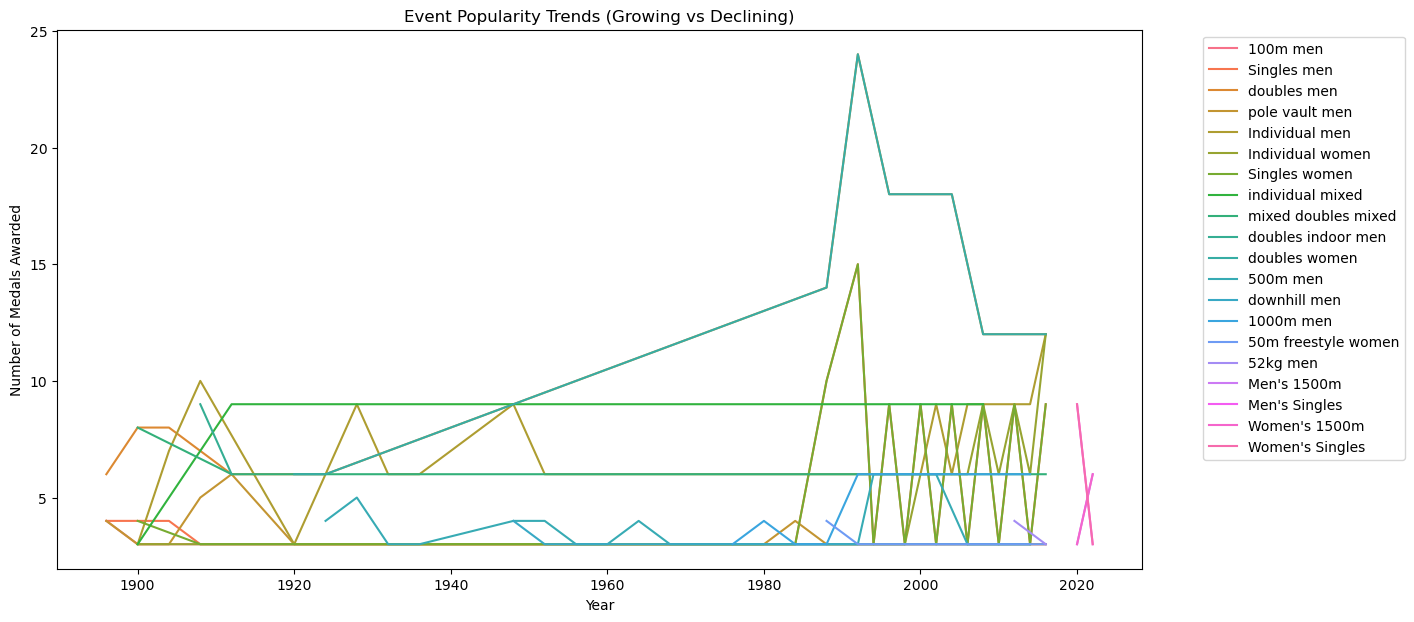

In [ ]:

# Events that have grown or declined in popularity (number of medals).

# Extract year
medal['year'] = medal['slug_game'].str.extract(r'(\d{4})').astype(int)

# --- Step 1: Count medals per event per year ---
event_trend = (
    medal.groupby(['year', 'event_title'])['medal_type']
    .count()
    .reset_index(name='medal_count')
)

# --- Step 2: Find overall growth/decline (slope approach) ---
# Compute change from first to last year for each event
growth = (
    event_trend.groupby('event_title')['medal_count']
    .agg(['first', 'last'])
    .reset_index()
)
growth['change'] = growth['last'] - growth['first']

# --- Step 3: Sort events by change ---
growing_events = growth.sort_values(by='change', ascending=False).head(10)
declining_events = growth.sort_values(by='change').head(10)

print("Top Growing Events:\n", growing_events)
print("\nTop Declining Events:\n", declining_events)

# --- Step 4: Visualization for a few examples ---
plt.figure(figsize=(14,7))
sample_events = growing_events['event_title'].tolist() + declining_events['event_title'].tolist()
sns.lineplot(
    data=event_trend[event_trend['event_title'].isin(sample_events)],
    x='year', y='medal_count', hue='event_title'
)
plt.title("Event Popularity Trends (Growing vs Declining)")
plt.xlabel("Year")
plt.ylabel("Number of Medals Awarded")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


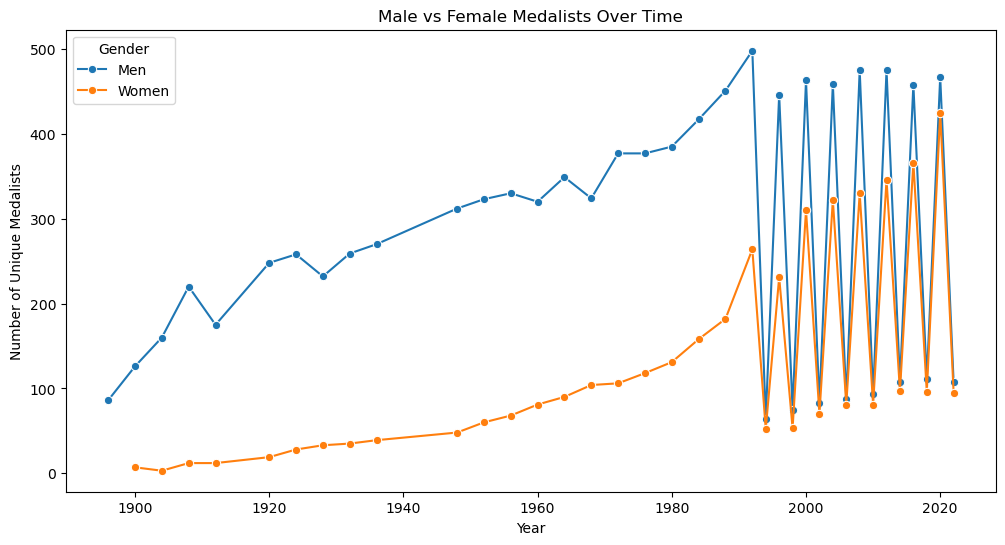

In [293]:
# How has the ratio of male vs. female medalists evolved?





# --- Step 1: Extract year from slug_game ---
medal["year"] = medal["slug_game"].str.extract(r"(\d{4})").astype(int)

# --- Step 2: Count medalists by year and gender ---
gender_count = medal.groupby(["year", "event_gender"])["athlete_full_name"].nunique().reset_index()

# --- Step 3: Filter only Male/Female (ignore Mixed) ---
gender_count = gender_count[gender_count["event_gender"].isin(["Men", "Women"])]

# --- Step 4: Rename for clarity ---
gender_count = gender_count.rename(columns={"event_gender": "Gender", "athlete_full_name": "Count"})

# --- Step 5: Visualization ---
plt.figure(figsize=(12,6))
sns.lineplot(data=gender_count, x="year", y="Count", hue="Gender", marker="o")

plt.title("Male vs Female Medalists Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Unique Medalists")
plt.legend(title="Gender")
plt.show()




# Olympics Analysis (1896–2022) – Summary of Insights

# Participation Trends

The Olympics have seen consistent growth in both athletes and countries across decades.

Summer Games always had larger participation than Winter Games, but both have grown steadily.

Certain dips in participation align with World Wars and global crises.

# Country Performance

USA, Russia/USSR, China, UK, and Germany are historically the top medal winners.

Country dominance differs slightly by medal type (Gold vs Silver vs Bronze).

Host nations tend to perform better during their home Games (clear “home advantage”).

Some emerging nations have started winning more medals in recent editions.

Medal density (medals per athlete) highlights efficiency: some smaller delegations achieve higher success rates compared to large squads.

# Athlete-Level Insights

Lists of the most decorated athletes show legends who have dominated multiple Olympics.

“Unknown” athlete entries were excluded to improve accuracy.

Age distribution: Most medalists fall in a typical competitive age range, with outliers capped to reduce noise.

# Gender Representation

Early Olympics were heavily male-dominated.

Over time, the female share of medalists has steadily increased.

Recent Games show near gender parity, especially in Summer Olympics.

Visualization of male vs female medalists ratio confirms this progress.

# Sport / Discipline Analysis

Some sports show clear country dominance (e.g., USA in Basketball, Kenya in Athletics long-distance).

Certain sports are highly concentrated, with only a few countries winning most of the medals.

New sports have been introduced gradually, often coinciding with host influence (e.g., Japan → Judo, USA → Baseball/Softball).

Popularity trends: some sports/events have grown in medal count, while others have declined or even disappeared.


# Host Country Performance

Countries hosting the Olympics typically experience a boost in medals compared to their usual performance.

Example: China in 2008 (Beijing), UK in 2012 (London).

Host performance often exceeds their long-term average, highlighting the home advantage effect.

# Time-Based Trends

Medal tallies of top nations (USA, Russia/USSR, China) show changing dominance across decades.

Participation and competitiveness have become more globalized over time.

Regional analysis shows Europe & North America historically dominated, but Asia has emerged strongly in the 21st century.